## Lab4. Pandas Grouping and Aggregation

#### IMPORT NECESSARY MODULES

In [1]:
import pandas as pd
df=pd.read_csv("thanksgiving-2015-poll-data.csv",encoding='Latin-1')

In [2]:
df.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [3]:
df.head(5)

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [4]:
df.shape

(1058, 65)

#### WHAT ARE UNIQUE VALUES OF"DO YOU THANKSGIVING?"COLUMNS

In [5]:
df['Do you celebrate Thanksgiving?'].unique()

array(['Yes', 'No'], dtype=object)

#### VIEW ALL COLUMN NAMES(TOP 5)

In [6]:
df.columns[1:5]

Index(['Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?'],
      dtype='object')

### Apply function to Series

### How many male,female and NaN in "What is your gender?" columns

In [7]:
df["What is your gender?"].value_counts(dropna=False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

In [8]:
import math
def gender_code(gender_string):
    if isinstance(gender_string,float)and math.isnan(gender_string):
        return gender_string
    return int(gender_string=="Female")

#### Apply gender_code()to What is your gender? column

In [9]:
df["gender"]=df["What is your gender?"].apply(gender_code)
df["gender"].value_counts(dropna=False)


1.0    544
0.0    481
NaN     33
Name: gender, dtype: int64

### Applying function to DataFrames 

#### check the data type of each column in data using a lambda function.just visualize data types of first 5 columns

In [10]:
df.apply(lambda x:x.dtype)[0:5]

RespondentID                                                                              int64
Do you celebrate Thanksgiving?                                                           object
What is typically the main dish at your Thanksgiving dinner?                             object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    object
How is the main dish typically cooked?                                                   object
dtype: object

#### DATA CLEANNING - Let us clean up income column

In [11]:
df["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts(dropna=False)

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
NaN                      33
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [12]:
import numpy as np
def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value , float)and math.isnan(value):
        return np.nan
    value = value.replace("$", "").replace(",","")
    
    income_high, income_low = value.split(" to ")
    return (int(income_high) + int(income_low)) / 2

#### Now apply this fuction to the "How much total combined money did  all member of your HOUSRHOLD earn last year?" columns and put it in new column "income"

In [13]:
df["income"] = df["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)
df["income"].head()

0     87499.5
1     62499.5
2      4999.5
3    200000.0
4    112499.5
Name: income, dtype: float64

### Grouping Data with Pandas

In [14]:
df["What type of cranberry saucedo you typically have?"].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [15]:
homemade = df[df["What type of cranberry saucedo you typically have?"] == "Homemade"]
canned = df[df["What type of cranberry saucedo you typically have?"] == "Canned"]

In [16]:
print(homemade["income"].mean())
print(canned["income"].mean())

94878.1072874494
83823.40340909091


In [17]:
grouped = df.groupby("What type of cranberry saucedo you typically have?")
grouped

In [18]:
dict(grouped.groups)

{'Canned': Int64Index([   4,    6,    8,   11,   12,   15,   18,   19,   26,   27,
             ...
             1040, 1041, 1042, 1044, 1045, 1046, 1047, 1051, 1054, 1057],
            dtype='int64', length=502),
 'Homemade': Int64Index([   2,    3,    5,    7,   13,   14,   16,   20,   21,   23,
             ...
             1016, 1017, 1025, 1027, 1030, 1034, 1048, 1049, 1053, 1056],
            dtype='int64', length=301),
 'None': Int64Index([   0,   17,   24,   29,   34,   36,   40,   47,   49,   51,
             ...
              980,  981,  997, 1015, 1018, 1031, 1037, 1043, 1050, 1055],
            dtype='int64', length=146),
 'Other (please specify)': Int64Index([   1,    9,  154,  216,  221,  233,  249,  265,  301,  336,  380,
              435,  444,  447,  513,  550,  749,  750,  784,  807,  860,  872,
              905, 1000, 1007],
            dtype='int64')}

In [19]:
grouped.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [20]:
for name,group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

Canned
(502, 67)
<class 'pandas.core.frame.DataFrame'>
Homemade
(301, 67)
<class 'pandas.core.frame.DataFrame'>
None
(146, 67)
<class 'pandas.core.frame.DataFrame'>
Other (please specify)
(25, 67)
<class 'pandas.core.frame.DataFrame'>


In [21]:
grouped["income"]

In [22]:
grouped["income"].size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: income, dtype: int64

#### Aggregating values in groups

In [23]:
grouped["income"].agg(np.mean)

What type of cranberry saucedo you typically have?
Canned                    83823.403409
Homemade                  94878.107287
None                      78886.084034
Other (please specify)    86629.978261
Name: income, dtype: float64

In [24]:
grouped.agg(np.mean)

,RespondentID,gender,income
What type of cranberry saucedo you typically have?,,,
Canned,4.336699e+09,0.552846,83823.403409
Homemade,4.336792e+09,0.533101,94878.107287
None,4.336765e+09,0.517483,78886.084034
Other (please specify),4.336763e+09,0.640000,86629.978261


### Plotting the results of aggregation

<AxesSubplot:xlabel='What type of cranberry saucedo you typically have?'>

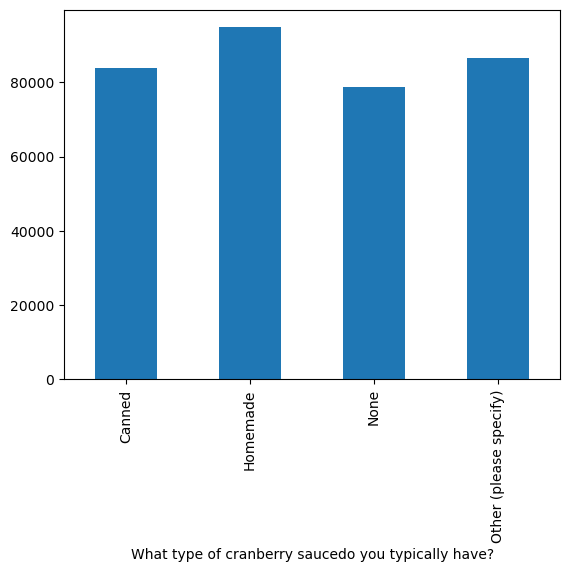

In [25]:
sauce = grouped.agg(np.mean)
sauce["income"].plot(kind="bar")

### Aggregation with multiple columns

In [26]:
grouped = df.groupby(["What type of cranberry saucedo you typically have?" ,"What type of cranberry saucedo you typically have?"])
grouped.agg(np.mean)

,,RespondentID,gender,income
What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have?,,,
Canned,Canned,4.336699e+09,0.552846,83823.403409
Homemade,Homemade,4.336792e+09,0.533101,94878.107287
None,None,4.336765e+09,0.517483,78886.084034
Other (please specify),Other (please specify),4.336763e+09,0.640000,86629.978261


### Aggregating with multiple functions

In [27]:
grouped=df.groupby("How would you describe where you live?")["What is typically the main dish at your Thanksgiving dinner?"]
grouped.apply(lambda x:x.value_counts())

How would you describe where you live?                        
Rural                                   Turkey                    189
                                        Other (please specify)      9
                                        Ham/Pork                    7
                                        Tofurkey                    3
                                        I don't know                3
                                        Turducken                   2
                                        Chicken                     2
                                        Roast beef                  1
Suburban                                Turkey                    449
                                        Ham/Pork                   17
                                        Other (please specify)     13
                                        Tofurkey                    9
                                        Chicken                     3
                           